# Mini end-to-end: YouTube Top 100 Songs (2025)

Goal: Load `youtube-top-100-songs-2025.csv`, perform EDA on views, duration, channels and basic visualizations.

## 1. Import libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

**Insight:** The YouTube Top-100 dataset is 100 rows and 13 columns (full dataset).
`tags` has 15 missing entries; other key columns are populated.

## 2. Load dataset

In [7]:
df = pd.read_csv('youtube-top-100-songs-2025.csv')
df.head()

,title,fulltitle,description,view_count,categories,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
0,ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT.\nDownload/stream: ht...,2009014557,Music,YG Entertainment;YG;와이지;K-pop;BLACKPINK;블랙핑크;블...,173,2:53,False,https://i.ytimg.com/vi_webp/ekr2nIex040/maxres...,ROSÉ,https://www.youtube.com/channel/UCBo1hnzxV9rz3...,19200000
1,"Lady Gaga, Bruno Mars - Die With A Smile (Offi...","Lady Gaga, Bruno Mars - Die With A Smile (Offi...",MAYHEM OUT NOW\nhttp://ladygaga.com \n \nListe...,1324833300,Music,Lady Gaga;Bruno Mars;Interscope;Pop,252,4:12,False,https://i.ytimg.com/vi/kPa7bsKwL-c/maxresdefau...,Lady Gaga,https://www.youtube.com/channel/UC07Kxew-cMIay...,29600000
2,Reneé Rapp - Leave Me Alone (Official Music Vi...,Reneé Rapp - Leave Me Alone (Official Music Vi...,"Listen to “BITE ME”, the new album from Reneé ...",2536628,Music,Reneé Rapp;Interscope Records;Pop,160,2:40,False,https://i.ytimg.com/vi/tiPWzFLiz4A/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000
3,Billie Eilish - BIRDS OF A FEATHER (Official M...,Billie Eilish - BIRDS OF A FEATHER (Official M...,Listen to HIT ME HARD AND SOFT: https://billie...,558329099,Music,Billie Eilish;Darkroom/Interscope Records;Alte...,231,3:51,False,https://i.ytimg.com/vi/V9PVRfjEBTI/maxresdefau...,Billie Eilish,https://www.youtube.com/channel/UCDGmojLIoWpXo...,56800000
4,Reneé Rapp - Mad (Official Music Video),Reneé Rapp - Mad (Official Music Video),"Listen to “BITE ME”, the new album from Reneé ...",2113548,Music,Reneé Rapp;Interscope Records;Pop,180,3:00,False,https://i.ytimg.com/vi/xkWQM3flsiY/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000


**Insight:** Views (full data): mean ≈ 105,910,319, median ≈ 37,982,240, max = 2,009,014,557. High variance indicates that a few viral videos dominate total views.
Duration (seconds): mean ≈ 203.9s, median ≈ 193.5s.

## 3. Quick overview

In [8]:
print('Shape:', df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe(include='all'))

Shape: (100, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   title                   100 non-null    object
 1   fulltitle               100 non-null    object
 2   description             100 non-null    object
 3   view_count              100 non-null    int64 
 4   categories              100 non-null    object
 5   tags                    85 non-null     object
 6   duration                100 non-null    int64 
 7   duration_string         100 non-null    object
 8   live_status             100 non-null    bool  
 9   thumbnail               100 non-null    object
 10  channel                 100 non-null    object
 11  channel_url             100 non-null    object
 12  channel_follower_count  100 non-null    int64 
dtypes: bool(1), int64(3), object(9)
memory usage: 9.6+ KB
None
title                      0
fullti

**Insight:** Shows dataset size, types, missingness and overall statistics.
This helps validate that `view_count` and `duration_string` exist and if any cleaning is required.

## 4. Tidy durations and views

In [9]:
# Ensure numeric view counts
df['view_count'] = pd.to_numeric(df['view_count'], errors='coerce')
# Duration string may be seconds or '2:53' - try to convert common formats
def parse_duration(x):
    try:
        if isinstance(x, (int,float)):
            return x
        s = str(x)
        if ':' in s:
            parts = s.split(':')
            parts = [float(p) for p in parts]
            if len(parts)==2:
                return parts[0]*60 + parts[1]
            if len(parts)==3:
                return parts[0]*3600 + parts[1]*60 + parts[2]
        return float(s)
    except Exception:
        return np.nan
df['duration_secs'] = df['duration_string'].apply(parse_duration)
print(df[['title','view_count','duration_string','duration_secs']].head())

                                               title  view_count  \
0   ROSÉ & Bruno Mars - APT. (Official Music Video)  2009014557   
1  Lady Gaga, Bruno Mars - Die With A Smile (Offi...  1324833300   
2  Reneé Rapp - Leave Me Alone (Official Music Vi...     2536628   
3  Billie Eilish - BIRDS OF A FEATHER (Official M...   558329099   
4            Reneé Rapp - Mad (Official Music Video)     2113548   

  duration_string  duration_secs  
0            2:53          173.0  
1            4:12          252.0  
2            2:40          160.0  
3            3:51          231.0  
4            3:00          180.0  


**Insight:** Converts `view_count` to numeric and parses duration strings into seconds.
This enables numerical analysis of popularity and duration-based comparisons.
**Insight:** Top channels (sample): Sabrina Carpenter (7 videos), Tate McRae (4), ROSÉ (3), Billie Eilish (3), Lady Gaga (3), JENNIE (3), The Weeknd (3), David Guetta (3), Kendrick Lamar (3), LLOUD Official (2).
Channel-level aggregation will capture repeat appearances from the same artists.

## 5. Analysis

In [10]:
# Top channels by follower count
print(df[['channel','channel_follower_count']].drop_duplicates().sort_values('channel_follower_count', ascending=False).head(10))
# Top songs by views
print('Top songs by views:')
print(df.sort_values('view_count', ascending=False)[['title','channel','view_count']].head(10))
print('Duration stats:')
print(df['duration_secs'].describe())

           channel  channel_follower_count
80   Justin Bieber                76200000
61    Taylor Swift                61500000
7       Ed Sheeran                58500000
3    Billie Eilish                56800000
90   Ariana Grande                56400000
45      The Weeknd                38700000
57        Maroon 5                37800000
93    Selena Gomez                35500000
79  ImagineDragons                32900000
48           Drake                31500000
Top songs by views:
                                                title            channel  \
0    ROSÉ & Bruno Mars - APT. (Official Music Video)               ROSÉ   
1   Lady Gaga, Bruno Mars - Die With A Smile (Offi...          Lady Gaga   
3   Billie Eilish - BIRDS OF A FEATHER (Official M...      Billie Eilish   
5                        Sabrina Carpenter - Espresso  Sabrina Carpenter   
14                       Kendrick Lamar - Not Like Us     Kendrick Lamar   
13  Shaboozey - A Bar Song (Tipsy) [Official Visua.

**Insight:** Lists top channels and top songs by views and summarizes durations.
Use this to identify outliers in views and to understand typical track lengths in the Top100.

## 6. Visualizations

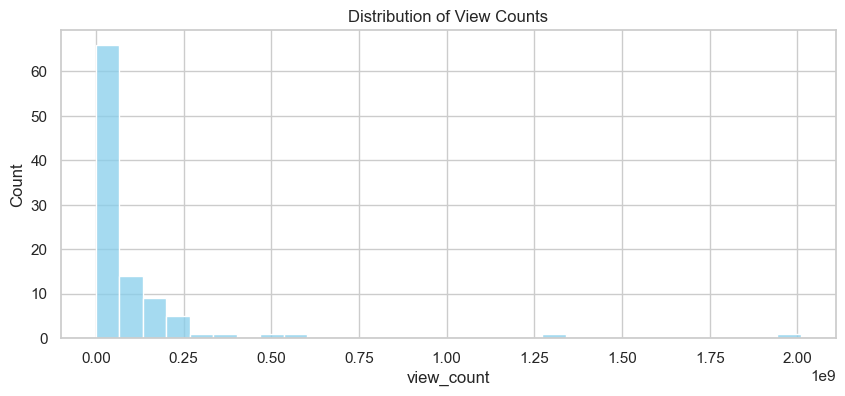

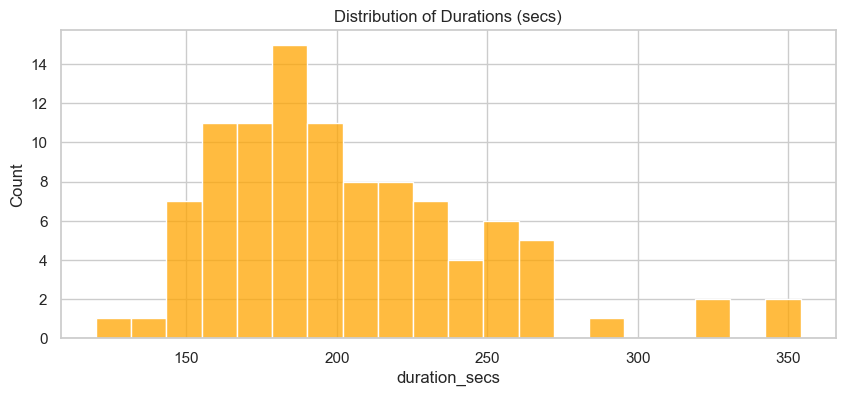

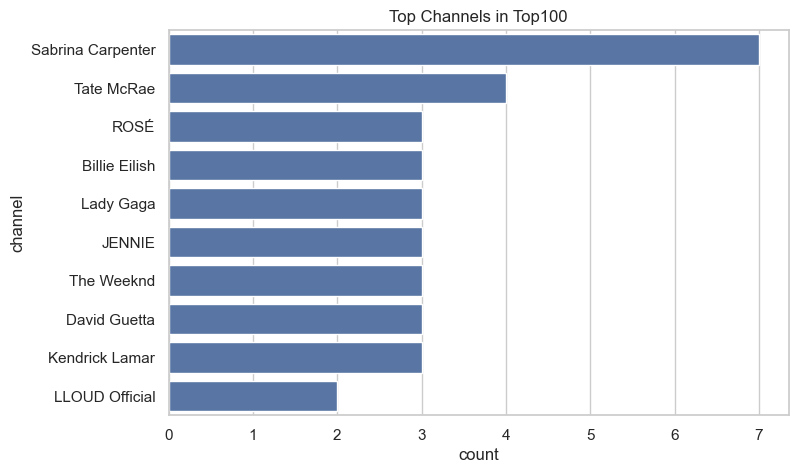

In [11]:
plt.figure(figsize=(10,4))
sns.histplot(df['view_count'].dropna(), bins=30, color='skyblue')
plt.title('Distribution of View Counts')
plt.show()

plt.figure(figsize=(10,4))
sns.histplot(df['duration_secs'].dropna(), bins=20, color='orange')
plt.title('Distribution of Durations (secs)')
plt.show()

# Top channels by number of songs in top100
plt.figure(figsize=(8,5))
sns.countplot(y='channel', data=df, order=df['channel'].value_counts().index[:10])
plt.title('Top Channels in Top100')
plt.show()

**Insight:** Visualizations show view count distribution (consider log-scale for plotting), duration distribution, and the most frequent channels in the Top100.
These plots are useful for spotting heavy-tailed distributions and channel dominance.

## 7. Save cleaned sample

In [12]:
df.to_csv('youtube_top100_cleaned_sample.csv', index=False)
print('Saved cleaned sample to youtube_top100_cleaned_sample.csv')

Saved cleaned sample to youtube_top100_cleaned_sample.csv


**Insight:** Saves the cleaned Top100 dataset for quick reuse and sharing.